In [38]:
import sys
sys.path.append('..')
from vlimit import vram_limit
vram_limit()

#### Imporove accuracy using Convolutions

In [14]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [15]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

2022-08-21 14:09:13.284957: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-21 14:09:13.285497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 14:09:13.285972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 14:09:13.286369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 


MODEL TRAINING:
Epoch 1/5
 177/1875 [=>............................] - ETA: 1s - loss: 0.7941 - accuracy: 0.7286

2022-08-21 14:09:14.450269: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 2s 785us/step - loss: 0.4950 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.3763 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.3365 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.3116 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.2949 - accuracy: 0.8908

MODEL EVALUATION:
313/313 [==============================] - 0s 776us/step - loss: 0.3598 - accuracy: 0.8680


In [39]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 800)               0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Conv2D layer parameters:

- The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
- The size of the Convolution. In this case, a 3x3 grid.
- The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
- In the first layer, the shape of the input data.

In [20]:
print(test_labels[:100])
test_labels[23]

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


9

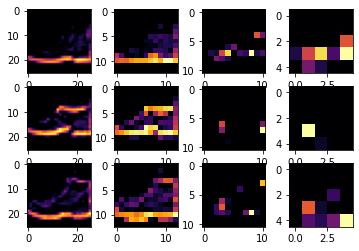

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

#### EXERCISES
1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

In [23]:
#1. 16 vs 32 vs 64
# Define the model
def compare_conv(conv):
    model = tf.keras.models.Sequential([

      # Add convolutions and max pooling
      tf.keras.layers.Conv2D(conv, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(conv, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      # Add the same layers as before
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Use same settings
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'\nMODEL TRAINING:')
    model.fit(training_images, training_labels, epochs=5)

    # Evaluate on the test set
    print(f'\nMODEL EVALUATION:')
    test_loss = model.evaluate(test_images, test_labels)
    
    
compare_conv(16)
compare_conv(64)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5203 - accuracy: 0.8113
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3516 - accuracy: 0.8721
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3082 - accuracy: 0.8869
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2779 - accuracy: 0.8974
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2570 - accuracy: 0.9038

MODEL EVALUATION:
313/313 [==============================] - 0s 986us/step - loss: 0.3001 - accuracy: 0.8926

MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4437 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2929 - accuracy: 0.8922
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2481 - accuracy: 0.9090
Epoch 4/5
1875/1875 [===========================

In [28]:
#Remove final Convolution, impact on training time? Faster with decrease acc
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #       tf.keras.layers.Conv2D(conv, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4837 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3341 - accuracy: 0.8805
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2922 - accuracy: 0.8943
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2645 - accuracy: 0.9028
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2435 - accuracy: 0.9097

MODEL EVALUATION:
313/313 [==============================] - 0s 847us/step - loss: 0.2787 - accuracy: 0.8984


In [29]:
#How about adding more Convolutions? What impact do you think this will have? Experiment with it. Slower with increase acc
#Remove final Convolution, impact on training time? Faster with decrease acc and bigger loss
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6389 - accuracy: 0.7671
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.8359
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3897 - accuracy: 0.8576
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3502 - accuracy: 0.8711
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.8810

MODEL EVALUATION:
313/313 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8731


In [31]:
#Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
#How about adding more Convolutions? What impact do you think this will have? Experiment with it. Slower with increase acc
#Remove final Convolution, impact on training time? Faster
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 2s 771us/step - loss: 0.5013 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.3766 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.3374 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 1s 762us/step - loss: 0.3114 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 1s 771us/step - loss: 0.2942 - accuracy: 0.8917

MODEL EVALUATION:
313/313 [==============================] - 0s 764us/step - loss: 0.3592 - accuracy: 0.8708


In [37]:
#Callback implementation
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training after reaching 60 percent accuracy

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

        # Check accuracy
        if(logs.get('acc') > 0.9):

          # Stop if threshold is met
            print("\nAccuracy is higher than 0.9 so cancelling training!")
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
#     Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Train the model with a callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4644 - acc: 0.8324
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3126 - acc: 0.8851
Epoch 3/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.2715 - acc: 0.9002
Accuracy is higher than 0.9 so cancelling training!
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2718 - acc: 0.9002
